# Mathematical Modeling: Takehome 2:
## Chapter 7: 10, 11abce; Chapter 8: 2, 3
### Author: Mitch Lowry <br> Date: April 22, 2016

**Problem 7.10:** (Murphy's Law, part $III$) A doctor of internal medicine with a busy practice expects to be called into the hospital to respond to a serious heart attack on average about once every two weeks. Assume that heart attacks in this physician's patient population occur at random with this rate. Once such emergency call is a challenge. Two such calls in a single day is a disaster.

__(a) How many heart attacks should the physician expect to respond to in a single year?__

Let the discrete random variable $X$ be the number of heart attacks the physician sees in a year. The event space here is $D = [0, \infty)$. To find $E(X)$ we must use the computation

<br>

$$E(X) = \sum_{x \in D} x \cdot P(X = x)$$,

<br>

which requires a probability density function for $X$. This can easily be obtained because the problem clearly describes $X$ as a Poisson process. Since the heartattacks occur at random with this rate, it is okay to adjust the rate to a yearly rate. We take the $\lambda$ value for a two week period, divide by the number of days in two weeks, and then multiply by the number of days in a year, so $\lambda = 365/14$; thus, using the equation for the pdf of a Poisson distribution we have

<br>

$P(X = x) = \dfrac{\lambda^x \mathrm{e}^{-\lambda}}{x!} = \dfrac{(365/14)^x \mathrm{e}^{-(365/14)}}{x!}$.

<br> 

Using $P$ we compute the expected value below. This is clearly a converging sum, so we stop computation when the expected value begins to increase by less than .01 percent.

In [1]:
import math

def pdf(lamb, freq):
    return (lamb**freq*math.e**(-lamb)/math.factorial(freq))

def percent_increased(final, initial):
    return (final - initial)/initial * 100

percent_increase = 10000
ave_rate = 365/14
sum_index = 0
expected_value = 0

while percent_increase > .01:
    sum_index += 1  #Can put this here because 0 term does not matter
    expected_value_prev = expected_value
    expected_value += pdf(ave_rate, sum_index)*sum_index
    if expected_value_prev != 0:
        percent_increase = percent_increased(expected_value, expected_value_prev)

print("The above calculation stopped after considering " + str(sum_index) + " heart" + \
      " attacks, and gives an approximate " + '\n' + "expected value of " + \
      str(expected_value) + ".")
print("\nNote that 365/14 = " + str(365/14) + ".")

The above calculation stopped after considering 48 heart attacks, and gives an approximate 
expected value of 26.06945410114863.

Note that 365/14 = 26.071428571428573.


We have proven previously that $E(X) = \lambda$ for a Poisson distribution, so the fact that the sum we computed converged to a number very close to $365/14$ is not surprising, given that we stated $\lambda = 365/14$. It was a cool check of the concept, nonetheless. It would have made more sense to stop the computation when I was certain the computation was within .01 percent of the actual value by using theorems abouts infinite series.

__(b) Explain why the probability, $H_{n}$, that $n$ heart attacks during the year all occur on different days is__

<br>

<center> $\dfrac{365}{365} \cdot \dfrac{364}{365} \cdot \dfrac{363}{365} \cdot \dots \cdot \dfrac{365 - n + 1}{365}$. </center>

For this modeling situation we make the assumption that the heart attacks in the physician's population are independent. This is a very reasonable assumption. The only way I can think of them being dependent is if some patient's know each other intimiately, friends or family, and the heart attacks of their loved ones potentially triggers or quickens the onset of some people's heart attacks. This would likely be a small effect that could potentially be accounted for, but the aforementioned effect is probably so negligable that adding it into the model would unnecessarily complicate it. Indeed, the problem states to assume a Poisson process.

<br>

We will prove this using induction. Suppose that $m$ heart attacks happen during a year. To find the probability that $n \le m$ randomly chosen heart attacks occur on different days we must use the fact that these heart attacks occur at random. For example, suppose that $1$ random heart attack took place. Since we can say that $1$ heart attack certainly occurred on one distinct day, we know that $H_{1} = 1$. That is, think about splitting up the year into $365$ equivalent time slots, which are days. The probability of $1$ heart attack occuring in one of these time slots that does not also have a heart attack in it is $365/365$ because it is equally likely it is within any of these slots (hence dividing by $365$) and all of the slots are available (hence the numerator of $365$). Now we have shown that the base case holds, suppose that the probability that $k$ heart attacks all occur on separate days is 

<br>

$H_{k} = \dfrac{365}{365} \cdot \dfrac{364}{365} \cdot \dfrac{363}{365} \cdot \dots \cdot \dfrac{365 - k + 1}{365}$.

<br>

We hope to show that 

<br>

$H_{k+1} = \dfrac{365}{365} \cdot \dfrac{364}{365} \cdot \dfrac{363}{365} \cdot \dots \cdot \dfrac{365 - k + 1}{365} \cdot \dfrac{365 - k}{365}$.

<br>

This is relatively straight forward. Since heart attacks are independent we can say that the probability of $k+1$ heart attacks happening on distinct days is equal to the probability that $k$ heart attacks happened on distinct days and one more heart attack happened on a day during which none of the other $k$ heart attacks happened. That is, $H_{k+1} = H_{k} \cdot P($1 more heart attack happens on a day during which the other $k$ did not$)$. Since this "final" heart attack is also equally likely to be in any of the $365$ days of the year, the probability that the "final" heart attack is not on any of the days during which there is has already been a heart attack is equal to the fraction of days on which none of the other $k$ heart attacks have happened. That is, 

<br>

$P($1 heart attack happens on a day during which the other $k$ did not$) = \dfrac{365 - k}{365}$;

<br>

thus, we have

<br>

$H_{k+1} = \dfrac{365}{365} \cdot \dfrac{364}{365} \cdot \dfrac{363}{365} \cdot \dots \cdot \dfrac{365 - k + 1}{365} \cdot \dfrac{365 - k}{365}$,

<br>

as desired.

__(c) What is the probability, $D$, that the doctor has to respond to two or more heart attacks on the same day sometime this year?__

We can compute $D$ by using the $H_{n}$. Let $P_{BAD}(n)$ be the probability that when $n$ heart attacks occur at least two of these heart attacks occur on the same day. It is impossible for $0$ or $1$ heart attack to occur on two distinct days, so $P_{BAD}(0) = P_{BAD}(1) = 0$. In fact, it is not necessary for our function to be defined here because this is useless, obvious information. Now either $0$, $1$, or more than $1$ heart attacks can occur during the year. The complement of the set containing all possible ways that two heart attacks can occur on the same day clearly includes when $0$ and $1$ heart attacks happen. The rest of the complement is when more than $1$ heart attack occurs per year and all of these attacks happened on distinct days, so $P_{BAD}(n) = 1 - H_{n}$ for $n \ge 2$ That is, we have the following relationship:

<br>

$$D = 1 - P_{0} - P_{1} - \sum_{x \in [2, \infty)} (1 - P_{BAD}(x)) \cdot P(X = x) =$$ $$1 - P_{0} - P_{1} - \sum_{x \in [2, \infty)} H_{x} \cdot P(X = x)$$.

<br>

We know have everything we need to make this computation.

In [2]:
percent_increase = 10000
ave_rate = 365/14
sum_index = 2

p0 = pdf(ave_rate, 0)
p1 = pdf(ave_rate, 1)
rest = 0
Hk = [365/365]

while percent_increase > .01:
    rest_prev = rest
    Hk.append((365 - sum_index + 1)/365)
    rest += pdf(ave_rate, sum_index)*(Hk[-1])
    if rest_prev != 0:
        percent_increase = percent_increased(rest, rest_prev)
    sum_index += 1

sum_index -= 1

print("The above calculation stopped after considering " + str(sum_index) + " heart" + \
      " attacks, and gives an approximate " + '\n' + "probability of " + \
      str(1 - p0 - p1 - rest) + ".")
print("Here we are checking that our indices in Hk are correct. \n" + str(Hk[:4]))

The above calculation stopped after considering 47 heart attacks, and gives an approximate 
probability of 0.0687546091736736.
Here we are checking that our indices in Hk are correct. 
[1.0, 0.9972602739726028, 0.9945205479452055, 0.9917808219178083]


**Problem 7.11:** A squadron of 16 bombers needs to penetrate air defenses to reach its target. They can either fly low and expose themselves to the air defense guns, or fly high and expose themselves to surface-to-air missiles. In either case, the air defense firing sequence proceeds in three stages. First, they must detect the target, then they must acquire the target (lock on target), and finally they must hit the target. Each of these stages may or may not succeed. The probabilities are as follows:

\begin{table}

\begin{tabular}{ c c c c } 

\hline
AD Type & P_{detect} & P_{acquire} & P_{hit} \\ [0.5ex] 
\hline
Low & 0.90 & 0.80 & 0.05 \\ 
High & 0.75 & 0.95 & 0.70 \\ [1ex] 
\hline

\end{tabular}

\end{table}

The guns can fire 20 shells per minute, and the missile installation can fire three per minute. The proposed flight path will expose the planes for one minute if they fly low, and five minutes if they fly high.

**(a) Determine the optimal flight path (low or high). The objective is to maximize the number of bombers that survive to strike the target.**

In order to maximize the number of bombers that survive, we will minimize the expected number of bombers hit. Let the discrete random variable $H$ be the number of bombers hit if $m$ bombers fly high, and let the discrete random variable $L$ be the number of bombers hit if $m$ bombers fly low. We will make the following assumptions:

<br>

**Assumptions:**

(1) The probability of success for each bullet is independent of the successes or failures of previously fired bullets.

(2) The probability of detection and acquisition does not depend on the success or failures of previous or concurrent targets and acquisitions. This assumption implies that the defense system is good enough and the number of bombers is low enough that the number of bombers being actively tracked or currently acquired does not decrease the effectiveness of the defense system.

(3) Once a target has been detected, it stays detected unless shot down.

(4) Once a target has been acquired, it stays acquired unless shot down.

(5) It takes only one bullet or missile to take down a plane. That is, multiple bullets do not hit the same plane, and the given probability of a bullet hitting is the probability of bullets hitting a plane without taking into account multiple bullets hitting it. Essientially it is one shot one kill and the system knows when it has hit a plane.

(6) A target cannot be accidentally hit, because, presumabely, the defense system should not allow for firing random missles when a target is not acquired, which first requires it to be targeted.

<br>

Suppose we start out a mission with $m$ bombers. Then the number of bombers targeted during the flight, $t$, the number of bombers acquired during the flight, $a$, and the number of bombers destroyed during the flight, $x$, are such that $m \ge t \ge a \ge x$. Let the discrete random variable $M$ be the number of bombers destroyed if $m$ bombers fly along some path with probability of each being targeted $P_t$, probability of each targeted bomber being acquired $P_a$, and probability of each bullet hitting an acquired plane $P_h$. Now let the discrete random variable $T$ be the number of $m$ planes which are successfully targeted; let the discrete random variable $A$ be the number of $t$ targeted planes that are successfully acquired; and let $X$ be the number of $a$ acquired planes that are successfully hit. In order for a bomber to be destroyed it must be targeted, then acquired, and then hit. Due to the nature of the problem it is clear that we have been given the described probabilities $P_t$, $P_a$, and $P_h$ for each of the high and low paths, and we can use $M$ as our generalization of $H$ and $L$. Thus, we have $P(M = x) = P(x$ bombers are hit $|a$ bombers are acquired$) \cdot P(a$ bombers are acquired $| t$ bombers are targeted$) \cdot P(t$ bombers are targeted$) = P(X = x) \cdot P(A = a) \cdot P(T = t)$.

<br>

Now we must define $P(T = t)$, $P(A = a)$, and $P(X = x)$. Each of $T$, $A$, and $X$ have binomial distributions. Let $b$ be the number of bullets shot during a flight. Then $T$, $A$, and $X$ have number of trials $m$, $t$, and $b$, number of successful outcomes $t$, $a$, and $x$, and probabilities of success $P_t$, $P_a$, and $P_h$, respectively. Then we have

<br>

$P(T = t) = \dbinom{m}{t} \cdot P_t^t \cdot (1 - P_t^{m-t})$,

<br>

$P(A = a) = \dbinom{t}{a} \cdot P_a^a \cdot (1 - P_a^{t-a})$,

<br>

and $P(X = x) = \dbinom{b}{x} \cdot P_h^x \cdot (1 - P_h^{b-x})$ with $b \ge x$.

<br>

Now consider that whenever $x$ bombers are hit, $x$ bombers are destroyed; however, there are many ways in which $x$ bombers can be hit. If $x$ bombers were hit, there was at least $x$ targeted bombers $t$ and at most $m$, and given such $t$ there was at least $x$ acquired bombers $a$ and at most $t$. If we sum over all of the possibilities we have

<br>

$$P(M = x) = P(X = x) \cdot (\sum_{t = x}^mP(T = t) \sum_{a = x}^t P(A = a)) = P(X = x) \cdot (\sum_{t = x}^m \sum_{a = x}^t P(T = t) \cdot P(A = a)) = $$ $$\sum_{t = x}^m \sum_{a = x}^t P(X = x) \cdot P(T = t) \cdot P(A = a)$$

<br>

We must now evaluate 

<br>

$$E(M) = \sum_{x \in [0, m]} x \cdot P(M = x) = \sum_{x \in [0, m]} x \sum_{t = x}^m \sum_{a = x}^t P(X = x) \cdot P(T = t) \cdot P(A = a) =$$ $$\sum_{x = 1}^m \sum_{t = x}^m \sum_{a = x}^t x P(X = x) \cdot P(T = t) \cdot P(A = a)$$.

In [3]:
import numpy

Ah = [] #Set of PX values for high
Bh = [] #Set of PT values for high
Ch = [] #Matrix of PA values for high
Dh = [] #Set of PM values for high

Al = [] #Set of PX values for low
Bl = [] #Set of PT values for low
Cl = [] #Matrix of PA values for low
Dl = [] #Set of PM values for low

m = 16
bh = 15    #Number of missiles is 3 per minute times 5 minutes
bl = 20    #Number of bullets is 20 per minute times 1 minute
Pth = 0.75 #P detection high
Pah = 0.95 #P lock-on high
Pxh = 0.70 #P hit high
Ptl = 0.90
Pal = 0.80
Pxl = 0.05


def PT(m, t, Pt):
    combo = math.factorial(m) / math.factorial(t) / math.factorial(m-t)
    return  combo * Pt**t*(1-Pt)**(m-t)

def PA(t, a, Pa):
    combo = math.factorial(t) / math.factorial(a) / math.factorial(t-a)
    return combo * Pa**a*(1-Pa)**(t-a)

def PX(b, x, Ph):
    combo = math.factorial(b) / math.factorial(x) / math.factorial(b-x)
    return combo * Ph**x*(1-Ph)**(b-x)

for x in range(0,m+1):
    if x <= bh:
        Ah.append(PX(bh, x, Pxh))
    if x > bh:
        Ah.append(1-sum(Ah))
    Bh.append(PT(m, x, Pth))
    row = []
    for y in range(0,m+1):
        if y <= x:
            row.append(PA(x, y, Pah))
    Ch.append(row)
    
for x in range(0,m+1):
    if x <= bl:
        Al.append(PX(bl, x, Pxl))
    Bl.append(PT(m, x, Ptl))
    row = []
    for y in range(0,m+1):
        if y <= x:
            row.append(PA(x, y, Pal))
    Cl.append(row)

c = 0
num2 = m + 1
while c < num2:
    num = m-c+1
    list1 = [Ah[c]] * num
    list2 = Bh[c:num2]
    product1 = [x*y for x,y in zip(list1, list2)]
    list3 = []
    d = 1
    while d < num:
        list3.append([product1[d-1]]*d)
        #print(list3[d-1])
        d += 1
    crazy_thing = []
    for z in Ch:
        for w in list3:
            product2 = [x*y for x,y in zip(z, w)]
            crazy_thing.append(product2)
    probability = 0
    for x in crazy_thing:
        for y in x:
            probability += y
    Dh.append(probability)
    c += 1
#print(list1)
print(Dh)
print(sum(Dh))

[1.9340520788345705e-07, 6.256375834713618e-06, 9.367518242488206e-05, 0.0008607876615620676, 0.005420556093461205, 0.024719855920462767, 0.08405551609893025, 0.2159438015819293, 0.419465202870807, 0.608977466605254, 0.6436504413847458, 0.47314492268284847, 0.22475206446061916, 0.06124955445171598, 0.0077277475242819235, 0.00026713201318505407, 0]
2.77033517431327


Something went terribly wrong with implementing this, and I spent way too much time trying to figure it out.

**(b) Each individual bomber has a 70% chance to destroy the target. Use the results of part (a) to determine the chances of success (target destroyed) for this mission.**

We have already assumed that the probability of success for each bomber is fixed at 70%, meaning the probability of success for one bomber does not depend on the successes or failures of other bombers. Thus, we have a binomial distribution with probability of success, $p$, equal to $0.7$. Thus, for $n$ surviving bombers each with probability of success $p$, the probability destroying the target $x$ times is given by the binomial pdf

<br>

$P(n, x, p) = \dbinom{n}{x} \cdot p^x \cdot (1-p)^{n-x}$.

<br>

We need only destroy the target one time, so we need only $P(n, x > 0, p) = 1 - P(n, 0, p)= 1 - (1-p)^{n}$. We can then use the expected value of deceased bombers, $E$, calculated in part (a) in the following equation. To use this value, we say that the probability of success is equal to the expected number of surviving bombers multiplied by the probability that the number of surviving bombers will succeed. In general, if we there were orginially $m$ pilots, then the expected remaining number of pilots is $n = m - Em$. If this is close to a whole number, I would compute $P($ success $) = n(1 - (1-p)^{n}$ by rounding, and if not, I would take the floor, $f$, and the ceiling, $c$, of $n$ and compute $\dfrac{f(1 - (1-p)^{f} + c(1 - (1-p)^{c}}{2}$

**(c) Determine the minimum number of bombers necessary to guarantee a 95% chance of mission success.**

To accomplish this I would use the $P($ success $)$ function that I just discussed. That is, I would compute $E$ for many values of $m$ and then use those values to solve the function for $m$ by setting $P($ success $) = 0.95$. We have one equation and one unknown.

**(e) Bad weather reduces both $P_{detect}$ and $p$, the probability that a bomber can destroy the target. If all of these probabilities are reduced in the same proportion, which side gains an advantage in bad weather?**

This would be easy to directly compute if I had figured out part $a$. Nonetheless, I can use my pdf for $E$ and the previous success analysis. For one thing, this scenario reduces the number of pilots who die, which should be the main priority of the bombers; however, each of these bombers becomes less effective somehow. If we look at the pdf for $E$ we can see that this recuding of $P_{detect}$ has somewhat of a combo-effect. That is, it reduces the likelyhood of people being spotted, so it results in less people being targeted, and, thus, less people dying. The likelyhood of success also seems to be less decreased by a proportional decrease in $p$ than it is by the increase in $P_{detect}$ because $p$ only shows up in the term multiplied by $E$, and that term is inversely proportational to the $1 -p$ that takes on a large exponient--an exponient that is made larger by the decrease in $P_{detect}$. I would say that the bombers gain advantage here.

**Problem 8.2:** (Requires a computer algebra system) Reconsider the inventory problem of Example $8.1$. In this problem we will explore the sensitivity of the probability $p$ that demand exceeds supply to the demand rate $\lambda$.

__(a) Calculate the probability that the demand for aquariums in a given weed exceeds the supply. Use the five-step method, and model as a Markov chain in steady state.__

<center> Background information from Example 8.1 </center>

<br>

A pet store sells a limited number of 20-gallon aquariums. At the end of each week, the store manager takes inventory and places orders. Store policy is to order three new 20-gallon aquariums at the end of the week if all the current inventory has been sold. If even one of the 20-gallon aquariums remains in stock, no new units are ordered. This policy is based on the observation that the store only sells an average of one of the 20-gallon aquariums per week. Is this policy adequate to guard against potential lost sales of 20-gallon aquariums due to a customer requesting one when they are out of stock?

### Step 1: Ask a question

Our question here is what is the probability that demand exceeds supply. In order to do this we must make some assumptions about the arrival of buyers who will purchase an aquarium if there is one in stock and the supply of aquariums at the beginning of any given week, which we define as $D_n$ and $S_n$, respectively. Our assumptions about the supply of aquariums have already been made by the store's current inventory policy, which we may or may not alter to improve profits. We assume that the probability distribution of the demand for aquariums is a poisson distribution centered at 1. A summary of step one is provided below.

<br>

**Variables:**

$S_n =$ supply of aquariums at the beginning of week $n$.

$D_n =$ demand for aquariums during week $n$.


**Assumptions:**

If $D_{n-1} < S_{n-1}$, then $S_n = S_{n-1} - D_{n-1}$.

If $D_{n-1} \ge S_{n-1}$, then $S_n = 3$.

$Pr(D_n = k) = \dfrac{e^{-\lambda}\lambda^k}{k!}$


**Objective:** 

Calculate $Pr(D_n > S_n)$.

<br>

### Step 2: Select a Modeling Approach

As designated by the problem, we will model this system as a Markov chain. 

### Step 3: Formulate the Model

Here we are considering the random variable $S_n$. We know that $S_n \in \{1, 2, 3\}$ because at the end of week $n-1$ there could potentially be $0$ aquariums left ($S_{n-1} < D_{n-1}$), which would mean $S_n = 3$, and otherwise we have $1$, $2$, or $3$ aquariums left at the end of week $n+1$. We have assumed that $D_n$ is a Poisson process centered at $1$, $S_n$ depends only on $S_{n-1}$. Thus, we can say that the sequence $\{S_n\}$ is a Markov chain.

We do not know the value of $S_0$, but it seems reasonable to make the assumption that $S_0 = 3$; however, we may adjust this assumption later on. 

The only way to get to state $j$ at time $n$ is to have come from some state $i$ at time $n-1$. We assume that the probability of changing between any two states is constant, i.e. it does not depend on time. We define $p_{ij}$ as the probability of going from state $i$ to state $j$.

First of all, the probability of transitioning between states is clearly dependent on the distribution of $D_n$. We compute relevant values of $D_n$ below.

In [4]:
def D(r, k):
    return r**k*math.e**(-r)/math.factorial(k)

# We will define m as the largest value of potential buyers that we are interested in.
# In this case we have m = 4.

vals = []
r = 1
m = 3
k = 0
while k <= m:
    vals.append(D(r, k))
    k += 1

vals.append(1-sum(vals))
    
for num in range(m+1):
    print(u'P(D\u2099 = ' + str(num) + ") = " + str(vals[num]) + ".")
    
    
print(u"P(D\u2099 > " + str(m) + ")" +  " = "  + str(vals[len(vals) - 1]) + ".")
print("As a check, the sum of these values is " + str(sum(vals)) + ".")

P(Dₙ = 0) = 0.36787944117144233.
P(Dₙ = 1) = 0.36787944117144233.
P(Dₙ = 2) = 0.18393972058572117.
P(Dₙ = 3) = 0.06131324019524039.
P(Dₙ > 3) = 0.01898815687615374.
As a check, the sum of these values is 1.0.


We can now use these probabilites to find the transition probabilites.

We can see the following:

* $p_{11} = P(D_n = 0)$.
* $p_{12} = 0$.
* $p_{13} = P(D_n \ge 1)$.
* $p_{21} = P(D_n = 1)$.
* $p_{22} = P(D_n =0)$.
* $p_{23} = P(D_n \ge 2)$.
* $p_{31} = P(D_n = 2)$.
* $p_{32} = P(D_n = 1)$.
* $p_{33} = P(D_n = 0) + P(D_n \ge 3)$.

We define our probability transition matrix as P. We will compute each of these in order below.

In [5]:
P = []
P.append([vals[0], 0, 1 - vals[0]])
P.append([vals[1], vals[0], 1 - vals[0] - vals[1]])
P.append([vals[2], vals[1], vals[0] + vals[3] + vals[4]])
print("P = " + str(P) + ".")

P = [[0.36787944117144233, 0, 0.6321205588285577], [0.36787944117144233, 0.36787944117144233, 0.26424111765711533], [0.18393972058572117, 0.36787944117144233, 0.44818083824283644]].


### Step 4: Solving the Model

It is clear that $\{S_n\}$ is ergodic; thus, we know that there is a unique steady-state probability vector $a$ that can be computed by solving the steady-state equations. Let $a_1$ be the probability of being in state $1$ in the long-run, $a_2$ be the probability of being in state $2$ in the long-run, and $a_3$ be the probability of being in state $3$ in the long-run. We know that $a = a \cdot P$, and also that $a_1 + a_2 + a_3 = 1$. We can see that we have $4$ equations and $3$ variables here, so we can remove one of the equations. We solve this using the SymPy library below.

In [6]:
from sympy import *

a = []
a2, a3, a4 = symbols('a1 a2 a3')
set_a = solve((a2 + a3 + a4 - 1, a2 - P[0][0]*a2 - P[1][0]*a3 - P[2][0]*a4, \
          a3 - P[0][1]*a2 - P[1][1]*a3 - P[2][1]*a4), (a2, a3, a4))

a.extend([float(set_a[a2]),float(set_a[a3]), float(set_a[a4])])

print(str(set_a))
print(str(a))

{a1: 0.284711341823441, a2: 0.263139991846263, a3: 0.452148666330296}
[0.284711341823441, 0.26313999184626313, 0.4521486663302959]


The main objective here, as outlined in step one is to compute $P(D_n > S_n)$. By probability rules we know that $$P(D_n > S_n) = \sum_{i=1}^{3} P(D_n > S_n | S_n = i) \cdot  P(S_n = i) = \sum_{i=1}^{3} P(D_n > S_n | S_n = i) \cdot  a_i$$.

We compute $P(D_n > S_n | S_n =i)$ below.

In [7]:
P_excess_demand_state_i = []

start = 1
stop = m+1
for i in range(start, stop):
    P_excess_demand_state_i.append(1 - sum(vals[:i+1]))
    #print(str(vals[:i+1])) Checking stuff
                        
P_excess_demand_state_i

[0.26424111765711533, 0.08030139707139416, 0.01898815687615374]

Now we compute the $P(D_n > S_n)$ by taking the dot product of $a$ and the above vector.

In [8]:
print(u"We have P(D\u2099 > S\u2099) = " + \
      str(sum(map(lambda x,y:x*y,P_excess_demand_state_i,a))))

We have P(Dₙ > Sₙ) = 0.10494842195131661


__(b) Perform a sensitivity analysis on the demand rate $\lambda$. Calculate the steady-state probability that demand exceeds supply, assuming $\lambda = 0.75$, $0.9$, $1.0$, $1,1$, and $1.25$, and display in graphical form, as in Figure $8.5$.__

I will do all of this in the below coding box.

The probability of excess demand given a lambda value of 0.75 is p = 0.0658343540033666.
The probability of excess demand given a lambda value of 0.9 is p = 0.08875307756111872.
The probability of excess demand given a lambda value of 1.0 is p = 0.10494842195131661.
The probability of excess demand given a lambda value of 1.1 is p = 0.12171114895274535.
The probability of excess demand given a lambda value of 1.25 is p = 0.14766133708859278.


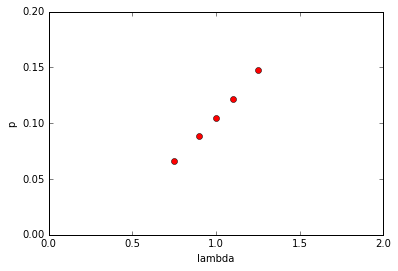

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def D(r, k):
    return r**k*math.e**(-r)/math.factorial(k)

freq = [0.75, 0.9, 1.0, 1.1, 1.25]

m = 3
start = 1
stop = m+1

vals = []

for r in freq:
    sub_vals = []
    k = 0
    while k <= m:
        sub_vals.append(D(r, k))
        k += 1
    vals.append(sub_vals)

#print(vals)

P = []

for x in vals:
    P.append([[x[0], 0, 1 - x[0]],[x[1], x[0], 1 - x[0] - x[1]], \
              [x[2], x[1], x[0] + x[3] + (1 - sum(x[:4]))]])

    
P_excess_demand_state_i = []

for x in vals:
    i = start
    sub_excess = []
    while i < stop:
        sub_excess.append(1 - sum(x[:i+1]))
        i += 1
    P_excess_demand_state_i.append(sub_excess)
                        
a = []

a2, a3, a4 = symbols('a1 a2 a3')
for x in P:
    set_a = solve((a2 + a3 + a4 - 1, a2 - x[0][0]*a2 - x[1][0]*a3 - x[2][0]*a4, \
              a3 - x[0][1]*a2 - x[1][1]*a3- x[2][1]*a4), (a2, a3, a4))

    a.append([float(set_a[a2]),float(set_a[a3]), float(set_a[a4])])

p = []
for z,w in zip(P_excess_demand_state_i,a):
    p.append(sum(map(lambda x,y:x*y,z,w))) 
    
#print(P_excess_demand_state_i)
#print(a)
for x,y in zip(freq, p):
    print("The probability of excess demand given a lambda value of " + str(x) + \
         " is p = " + str(y) + ".")
plt.plot(freq, p, 'ro')
plt.axis([0, 2, 0, .20])
plt.ylabel('p')
plt.xlabel('lambda')
plt.show()

__(c) Let $p$ denote the steady-state probability that demand exceeds supply. Use the results of part (b) to estimate $S(p, \lambda)$.__

This looks pretty linear. For our measurement we will take the percentage change in $p$ divided by the percentage change in $\lambda$.

In [11]:
def elast(point1,point2):
    return ((point2[1] - point1[1])/point1[1])/((point2[0] - point1[0])/point1[0])

i = 0
while i < len(freq) -1:
    point2 = [p[i+1], freq[i+1]]
    point1 = [p[i], freq[i]]
    print("The elasticity using between lambda values of " + str(freq[i]) + " and " + \
          str(freq[i+1]) + " is " + str(elast(point2, point1)) + ".")
    i += 1

The elasticity using between lambda values of 0.75 and 0.9 is 0.6454189979754095.
The elasticity using between lambda values of 0.9 and 1.0 is 0.6480159941201118.
The elasticity using between lambda values of 1.0 and 1.1 is 0.660074575207958.
The elasticity using between lambda values of 1.1 and 1.25 is 0.6828220419008719.


__Problem 8.3:__ Reconsider the inventory problem of Example $8.1$, but now suppose that the inventory policy depends on recent sales history. Whenever inventory drops to zero, the number of units ordered is equal to two plus the number sold over the past week, up to a maximum of four.

__(a) Determine the steady-state probability distribution of the number of aquariums in stock. Use the five-step method, and model as a Markov chain.__

__(b) Determine the steady-state probability that demand exceeds supply.__

__(c) Determine the average size of a resupply order.__

__(d) Repeat parts (a) and (b), but now suppose that weekly demand is Poisson with a mean of $2$ customers per week.__